In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage


# bozu = cv2.imread('Bozu.png')
# background = cv2.cvtColor(cv2.imread('hawaii.webp'), cv2.COLOR_RGB2BGR)
# surfboard = cv2.cvtColor(cv2.imread('surfboard.png'), cv2.COLOR_RGB2BGR)


In [174]:
def overlay(overlay_img, bg_img, scale, starting_y, starting_x, rotate=False, choice=''):
    # Rotating image 45 degrees if it has to be rotated
    if rotate:
        img = overlay_img
        overlay_img = scipy.ndimage.rotate(overlay_img, 45)
        # cropped_image = tr[200:1150, 100:1165]
        # plt.imshow(cropped_image)
        # overlay_img = cropped_image
    
    # Scaling image
    overlay_img = cv2.resize(overlay_img, (0, 0), fx=scale, fy=scale)

    # Overlaying overlay image ontop of background image
    bg_img[starting_y:overlay_img.shape[0]+starting_y,
              starting_x:overlay_img.shape[1] +starting_x] = overlay_img

    # Showing image
    plt.title(choice)
    plt.imshow(bg_img)
    plt.show()

    return bg_img


In [175]:
def sepia(image):
    kernel = np.array([[0.393, 0.769, 0.189],
                       [0.349, 0.686, 0.168],
                       [0.272, 0.534, 0.131]])

    # multiply each layer (r, g, b) by the corresponding array to convert to sepia
    sepia_img = cv2.transform(image, kernel)

    return sepia_img


def sharpen(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 9.5, -1],
                       [-1, -1, -1]])
    # change the pixel intensity value of an image based on the surrounding pixel intensity values
    sharpened_img = cv2.filter2D(image, -1, kernel)

    return sharpened_img


def sharpened_sepia(image):
    sepia_img = sepia(image)
    sharpened_img = sharpen(sepia_img)
    converted_color = cv2.cvtColor(sharpened_img, cv2.COLOR_RGB2BGR)
    
    return converted_color


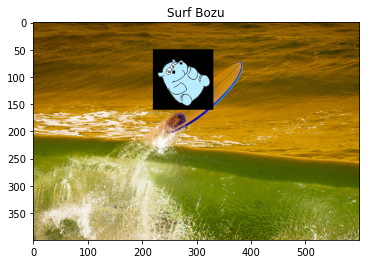

In [176]:
def surf_bozu(overlay_img, background_img):
    sepia_img = sharpened_sepia(overlay_img)

    cropped_image = background_img[0:400, 100:700]

    bozu_surfing = overlay(sepia_img, cropped_image, 0.09, 50, 220, True, 'Surf Bozu')

    cv2.imwrite('Bozu_Surfing.jpg', bozu_surfing)

    
bozu = cv2.imread('bozu.png')
waves = cv2.imread('surf_water.jpeg')
surf_bozu(bozu, waves)
